In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Harmful Brain Activity Classification

## Background of EEG and Spectrograms

Electroencephalograms (EEGs) and spectrograms are both valuable tools in understanding and studying brain activity. EEGs measure electrical activity in the brain by placing electrodes on the scalp, detecting and recording the collective neural signals produced by the firing of neurons. These signals are then translated into wave patterns, providing insights into different states of consciousness, such as sleep stages, seizures, and cognitive processes. EEGs are used in clinical settings to diagnose and monitor neurological diseases.

On the other hand, spectrograms are visual representations of the frequencies of EEG signals over time. In the context of brain activity, spectrograms can be generated from EEG data to illustrate the distribution of frequencies present in the recorded neural signals across a time interval.

To create a spectrogram from EEG data, the raw EEG signals are processed using mathematical techniques like the Fourier transform, which breaks down the signals into their individual frequency components. The resulting frequency data is plotted over time, producing a spectrogram that illustrates the changes in frequency content. This technique is particularly valuable in identifying harmful/irregular brainwave patterns associated with harmful conditions such as epileptic seizures. By analyzing the spectrogram, clinicians and researchers can pinpoint specific frequency abnormalities and classify them according to their particular characteristics.

## Data Description

__train.csv__ - Table containing metadata and target features

    eeg_id - A unique identifier for the entire EEG recording.
    eeg_sub_id - An ID for the specific 50 second long subsample this row's labels apply to.
    eeg_label_offset_seconds - The time between the beginning of the consolidated EEG and this subsample.
    spectrogram_id - A unique identifier for the entire EEG recording.
    spectrogram_sub_id - An ID for the specific 10 minute subsample this row's labels apply to.
    spectogram_label_offset_seconds - The time between the beginning of the consolidated spectrogram and this subsample.
    label_id - An ID for this set of labels.
    patient_id - An ID for the patient who donated the data.
    expert_consensus - The consensus annotator label. Provided for convenience only.
    [seizure/lpd/gpd/lrda/grda/other]_vote - The count of annotator votes for a given brain activity class. The full names of the activity classes are as follows: lpd: lateralized periodic discharges, gpd: generalized periodic discharges, lrd: lateralized rhythmic delta activity, and grda: generalized rhythmic delta activity . A detailed explanations of these patterns is available here.

__train_spectrogram__ - Folder containing 'spectrogram_id'.parquet files

    time - time in seconds, offset by 1 second
    LL_0.xx, RL_0.xx, RP_0.xx, LP_0.xx - frequency measurements in different brain regions

__train_eeg__ - Folder containing 'eeg_id'.parquet files

    Fp1, F3, C3..... - Time series data of brain activity at 20 different sensors located on the scalp.
    EKG - Time series data of heart palpitations


__test data__


    eeg_id
    spectrogram_id
    patient_id



## Initial EDA of train data



### train.csv

In [2]:
df = pd.read_csv('train.csv')
df.shape

(106800, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [4]:
df.head(10)

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0  1628180742           0                       0.0          353733   
1  1628180742           1                       6.0          353733   
2  1628180742           2                       8.0          353733   
3  1628180742           3                      18.0          353733   
4  1628180742           4                      24.0          353733   
5  1628180742           5                      26.0          353733   
6  1628180742           6                      30.0          353733   
7  1628180742           7                      36.0          353733   
8  1628180742           8                      40.0          353733   
9  2277392603           0                       0.0          924234   

   spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                   0                               0.0   127492639   
1                   1                               6.0  3887563113   
2                   2                               8.0  1142670488   
3                   3                              18.0  2718991173   
4                   4                              24.0  3080632009   
5                   5                              26.0  2413091605   
6                   6                              30.0   364593930   
7                   7                              36.0  3811483573   
8                   8                              40.0  3388718494   
9                   0                               0.0  1978807404   

   patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  lrda_vote  \
0       42516          Seizure             3         0         0          0   
1       42516          Seizure             3         0         0          0   
2       42516          Seizure             3         0         0          0   
3       42516          Seizure             3         0         0          0   
4       42516          Seizure             3         0         0          0   
5       42516          Seizure             3         0         0          0   
6       42516          Seizure             3         0         0          0   
7       42516          Seizure             3         0         0          0   
8       42516          Seizure             3         0         0          0   
9       30539              GPD             0         0         5          0   

   grda_vote  other_vote  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          0           0  
5          0           0  
6          0           0  
7          0           0  
8          0           0  
9          1           5

In [5]:
df.describe().T

count          mean           std  \
eeg_id                            106800.0  2.104387e+09  1.233371e+09   
eeg_sub_id                        106800.0  2.628619e+01  6.975766e+01   
eeg_label_offset_seconds          106800.0  1.188172e+02  3.145578e+02   
spectrogram_id                    106800.0  1.067262e+09  6.291475e+08   
spectrogram_sub_id                106800.0  4.373360e+01  1.042921e+02   
spectrogram_label_offset_seconds  106800.0  5.204314e+02  1.449760e+03   
label_id                          106800.0  2.141415e+09  1.241670e+09   
patient_id                        106800.0  3.230443e+04  1.853820e+04   
seizure_vote                      106800.0  8.780243e-01  1.538873e+00   
lpd_vote                          106800.0  1.138783e+00  2.818845e+00   
gpd_vote                          106800.0  1.264925e+00  3.131889e+00   
lrda_vote                         106800.0  9.482959e-01  2.136799e+00   
grda_vote                         106800.0  1.059185e+00  2.228492e+00   
other_vote                        106800.0  1.966283e+00  3.621180e+00   

                                       min           25%           50%  \
eeg_id                            568657.0  1.026896e+09  2.071326e+09   
eeg_sub_id                             0.0  1.000000e+00  5.000000e+00   
eeg_label_offset_seconds               0.0  6.000000e+00  2.600000e+01   
spectrogram_id                    353733.0  5.238626e+08  1.057904e+09   
spectrogram_sub_id                     0.0  2.000000e+00  8.000000e+00   
spectrogram_label_offset_seconds       0.0  1.200000e+01  6.200000e+01   
label_id                             338.0  1.067419e+09  2.138332e+09   
patient_id                            56.0  1.670700e+04  3.206800e+04   
seizure_vote                           0.0  0.000000e+00  0.000000e+00   
lpd_vote                               0.0  0.000000e+00  0.000000e+00   
gpd_vote                               0.0  0.000000e+00  0.000000e+00   
lrda_vote                              0.0  0.000000e+00  0.000000e+00   
grda_vote                              0.0  0.000000e+00  0.000000e+00   
other_vote                             0.0  0.000000e+00  0.000000e+00   

                                           75%           max  
eeg_id                            3.172787e+09  4.294958e+09  
eeg_sub_id                        1.600000e+01  7.420000e+02  
eeg_label_offset_seconds          8.200000e+01  3.372000e+03  
spectrogram_id                    1.623195e+09  2.147388e+09  
spectrogram_sub_id                2.900000e+01  1.021000e+03  
spectrogram_label_offset_seconds  3.940000e+02  1.763200e+04  
label_id                          3.217816e+09  4.294934e+09  
patient_id                        4.803600e+04  6.549400e+04  
seizure_vote                      1.000000e+00  1.900000e+01  
lpd_vote                          1.000000e+00  1.800000e+01  
gpd_vote                          0.000000e+00  1.600000e+01  
lrda_vote                         1.000000e+00  1.500000e+01  
grda_vote                         1.000000e+00  1.500000e+01  
other_vote                        2.000000e+00  2.500000e+01

<ipython-input-6-8dd256666065>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dat.index, y=dat.values, palette='viridis')


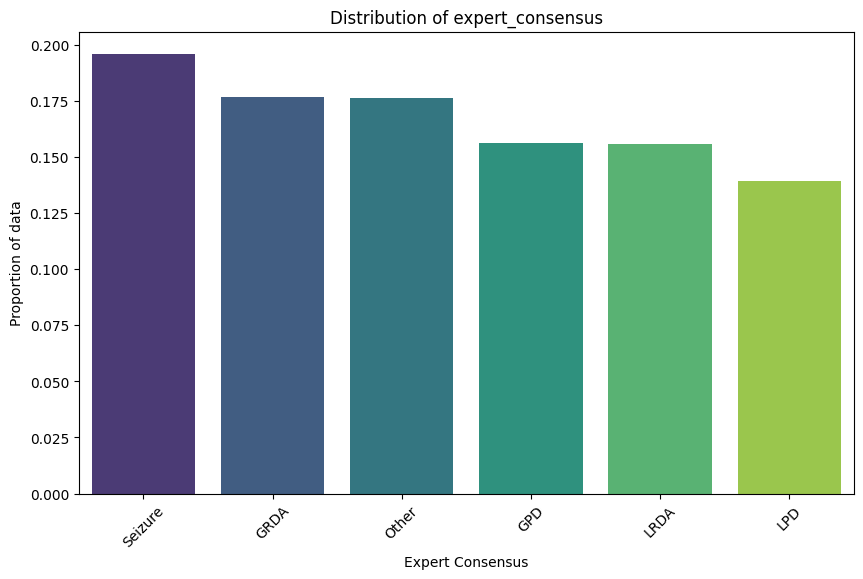

In [6]:
dat = df['expert_consensus'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=dat.index, y=dat.values, palette='viridis')
plt.title('Distribution of expert_consensus')
plt.xlabel('Expert Consensus')
plt.ylabel('Proportion of data')
plt.xticks(rotation=45)
plt.show();

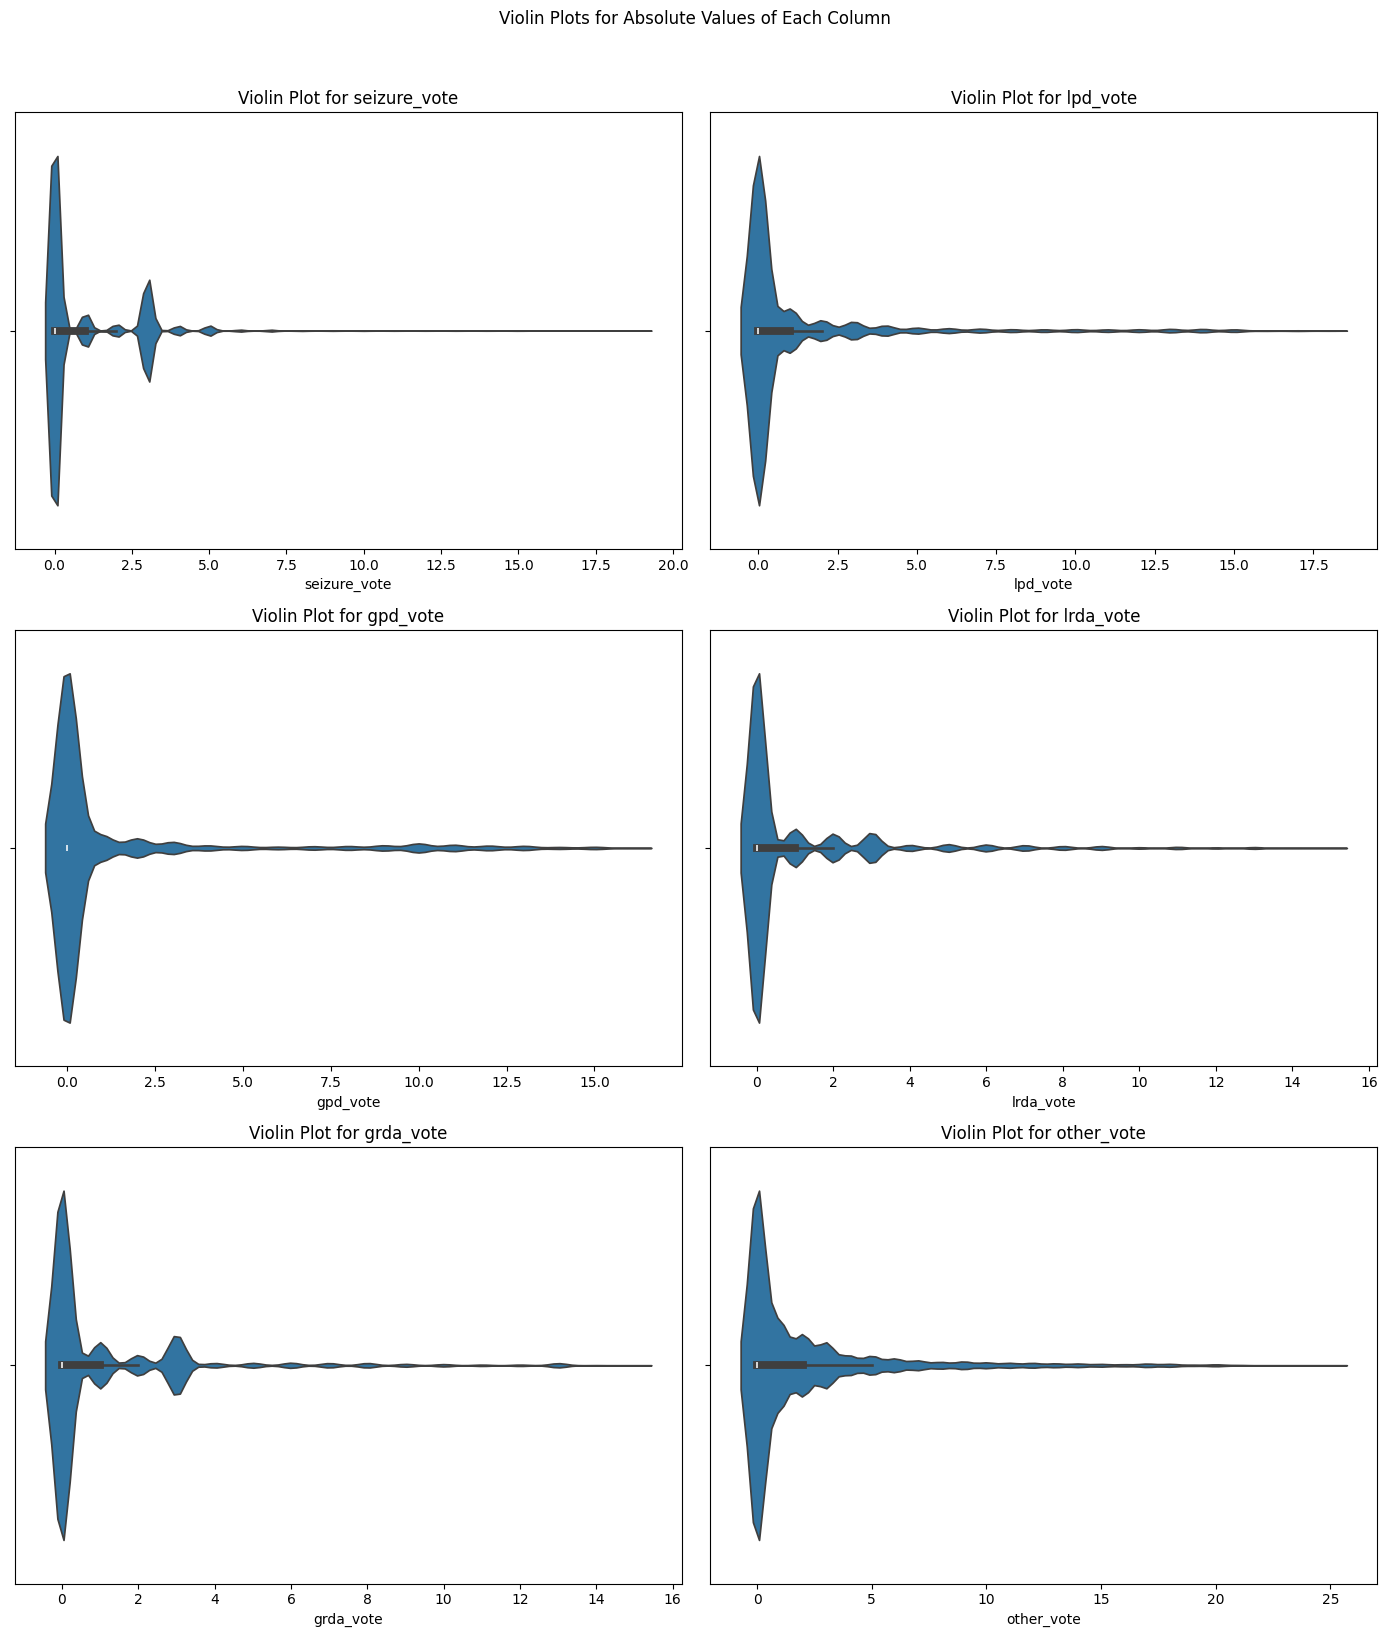

In [7]:
columns_to_plot = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
plt.figure(figsize=(14, 16))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(x=df[column])
    plt.title(f'Violin Plot for {column}')

plt.suptitle('Violin Plots for Absolute Values of Each Column', y=1.02)
plt.tight_layout()
plt.show()

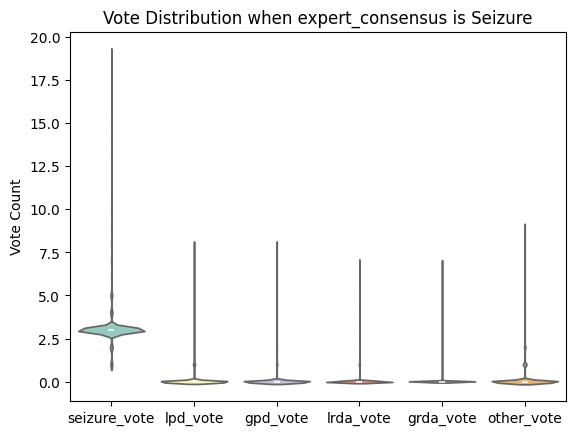

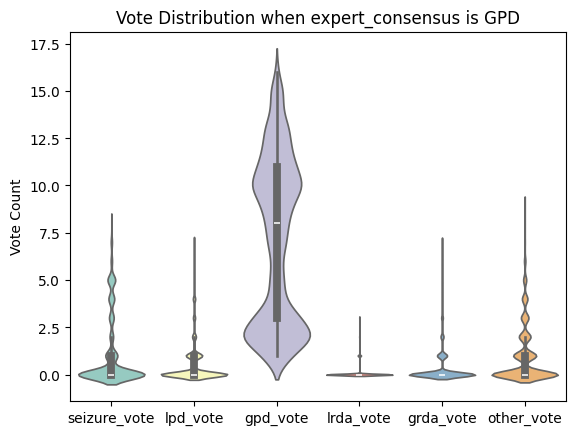

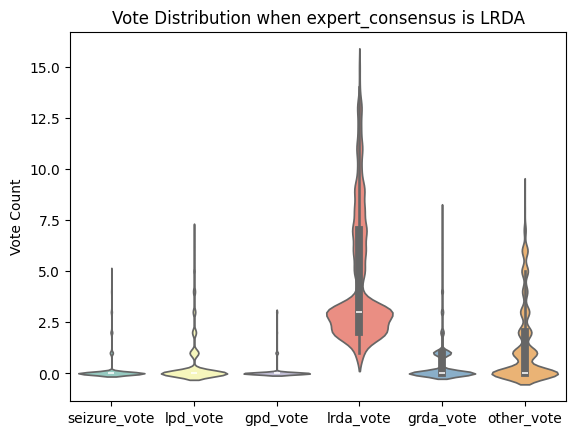

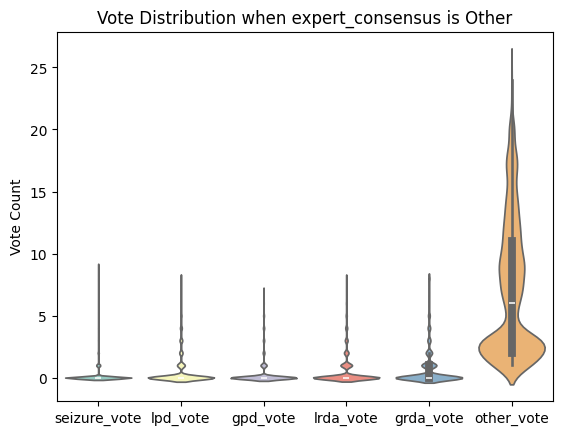

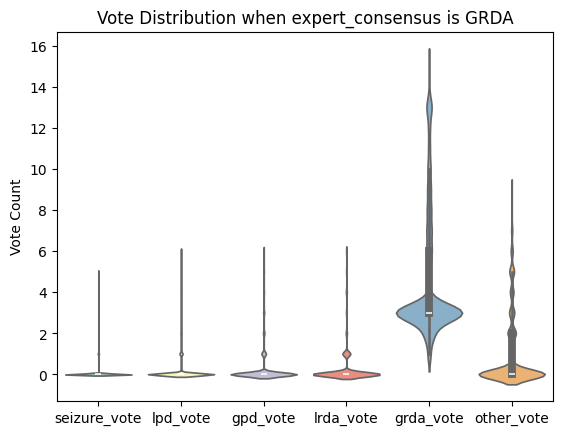

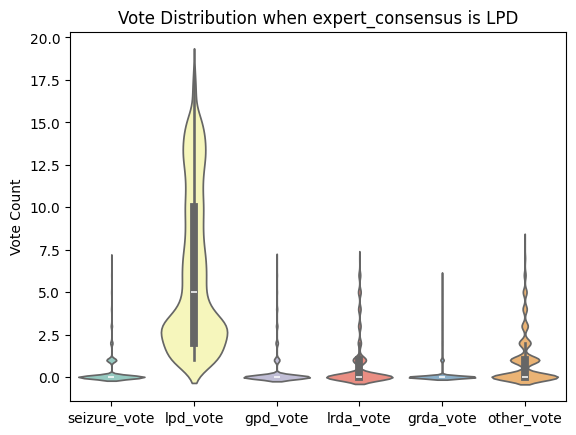

In [8]:
expert_consensus_values = df['expert_consensus'].unique()
voting_categories = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

for value in expert_consensus_values:
    subset_df = df[df['expert_consensus'] == value][voting_categories]
    sns.violinplot(data=subset_df.iloc[:, :], palette="Set3")
    plt.title(f'Vote Distribution when expert_consensus is {value}')
    plt.ylabel('Vote Count')
    plt.show()

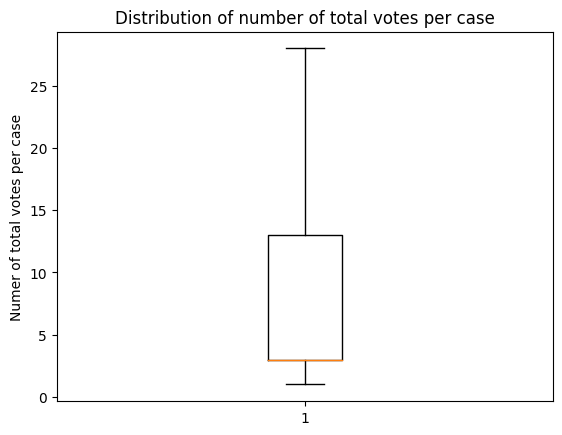

In [9]:
total_votes = df[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].sum(axis=1)
plt.boxplot(total_votes)
plt.title('Distribution of number of total votes per case')
plt.ylabel('Numer of total votes per case')
plt.show()

This plot shows that most rows contain 3 votes, however there are some rows that have more than 25 individual votes. Therefore, not every case (row) is being looked at by the same number of specialists. We have to consider this when preprocessing our target.

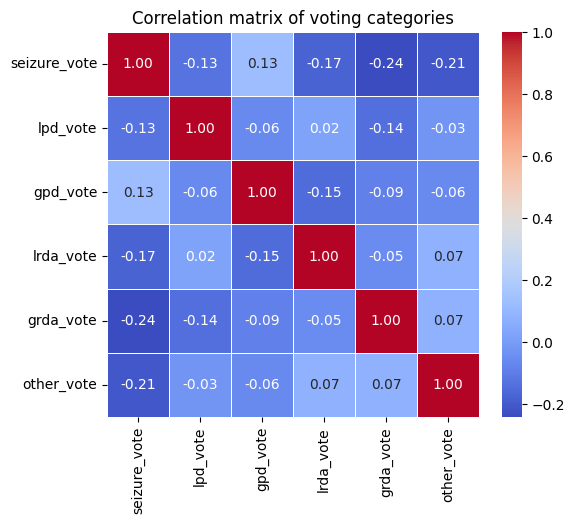

In [10]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[columns_to_plot].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation matrix of voting categories')
plt.show()

In [11]:
print('There are ', df['eeg_id'].nunique(), ' eeg data entries')
print('There are ', df['spectrogram_id'].nunique(), ' spectrogram data entries')
print('There are ', df['patient_id'].nunique(), ' different patients')

There are  17089  eeg data entries
There are  11138  spectrogram data entries
There are  1950  different patients


### Sample eeg table

To map from the metadata in the train.csv file to an eeg file we reference the eeg_id number. Each eeg_sub_id references a 50-second long subsample of one eeg. The eeg was performed with a frequency of 200 Hz, therefore, in every one second 200 records are created. Each sub-sample of 50 seconds then contains 50x200 = 10000 rows. We can determine at which row the subsample begins and ends using the eeg_label_offset_seconds feature. If the offset is equal to 28 seconds, we can navigate to row number 28x200 - 1 = 5599, which is where the subsample begins. It ends after 50 seconds, or 10000 rows later. Therefore the rows of the subsample are rows 5599 to 15599.

In [12]:
df[df['eeg_id'] == 2259539799]

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
69034  2259539799           0                       0.0      1391458063   
69035  2259539799           1                       2.0      1391458063   
69036  2259539799           2                      22.0      1391458063   
69037  2259539799           3                      28.0      1391458063   
69038  2259539799           4                      30.0      1391458063   
...           ...         ...                       ...             ...   
69772  2259539799         738                    3352.0      1391458063   
69773  2259539799         739                    3362.0      1391458063   
69774  2259539799         740                    3364.0      1391458063   
69775  2259539799         741                    3366.0      1391458063   
69776  2259539799         742                    3372.0      1391458063   

       spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
69034                   0                               0.0  1637343004   
69035                   1                               2.0  1560312366   
69036                   2                              22.0  1736488717   
69037                   3                              28.0   833092343   
69038                   4                              30.0  1038566620   
...                   ...                               ...         ...   
69772                 738                            3352.0  2422291133   
69773                 739                            3362.0  1963194865   
69774                 740                            3364.0  1817843914   
69775                 741                            3366.0  2195806679   
69776                 742                            3372.0  1822288123   

       patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  \
69034        2641              GPD             5         0        10   
69035        2641              GPD             5         0        10   
69036        2641              GPD             5         0        10   
69037        2641              GPD             5         0        10   
69038        2641              GPD             5         0        10   
...           ...              ...           ...       ...       ...   
69772        2641              GPD             5         0        10   
69773        2641              GPD             5         0        10   
69774        2641              GPD             5         0        10   
69775        2641              GPD             5         0        10   
69776        2641              GPD             5         0        10   

       lrda_vote  grda_vote  other_vote  
69034          0          0           0  
69035          0          0           0  
69036          0          0           0  
69037          0          0           0  
69038          0          0           0  
...          ...        ...         ...  
69772          0          0           0  
69773          0          0           0  
69774          0          0           0  
69775          0          0           0  
69776          0          0           0  

[743 rows x 15 columns]

In [13]:
df_eeg = pd.read_parquet('2259539799.parquet')
df_eeg.shape

(684400, 20)

In [14]:
df_eeg.head()

Fp1         F3     C3    P3         F7         T3         T5     O1  \
0 -42.110001 -29.850000 -11.75  0.90 -46.790001 -58.509998 -46.759998  -3.15   
1 -37.880001 -26.680000 -12.61 -1.25 -43.480000 -58.279999 -49.029999  -5.92   
2 -44.889999 -28.870001 -13.70 -4.53 -44.320000 -60.150002 -51.880001 -10.11   
3 -30.950001 -21.980000 -10.18 -4.15 -38.400002 -57.270000 -50.529999 -11.32   
4 -16.650000 -11.680000  -4.09 -0.36 -30.120001 -50.980000 -46.500000  -7.77   

      Fz         Cz         Pz        Fp2         F4         C4     P4  \
0   1.94  44.349998  24.830000 -33.150002 -61.540001 -16.389999  16.18   
1   3.91  44.439999  21.420000 -28.719999 -55.349998 -15.210000  14.24   
2   1.00  45.669998  18.260000 -33.619999 -51.270000 -15.530000  12.69   
3   7.41  48.779999  18.540001 -19.049999 -40.240002 -12.390000  13.28   
4  15.96  52.340000  20.490000  -4.530000 -30.000000  -8.440000  14.96   

          F8         T4    T6    O2   EKG  
0 -56.230000 -37.860001 -6.50 -6.31 -5.63  
1 -49.799999 -39.500000 -7.00 -6.44 -1.36  
2 -46.759998 -33.410000 -7.38 -7.63  1.18  
3 -37.090000 -27.820000 -8.45 -8.80 -4.78  
4 -27.790001 -29.430000 -6.02 -7.57 -1.93

Each column in the eeg data corresponds to a location of a sensor in the different regions of the skull. The values correspond to the amplitude of the signal every 1/200 seconds. The last feature is of an EKG.

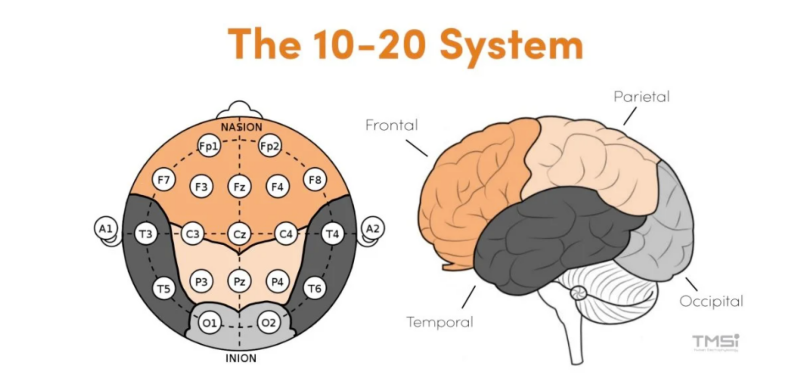

In [16]:
img = plt.imread('brain_photo1.png')
plt.figure(figsize = (10,6))
plt.axis('off')
plt.imshow(img);

In [17]:
df_eeg.describe().T

count        mean          std           min        25%        50%  \
Fp1  684400.0  -36.600716    60.119858   -916.789978 -69.059998 -39.119999   
F3   684400.0  -35.357384   118.500824  -3135.300049 -81.129997 -42.590000   
C3   684400.0  -16.830496    77.998177   -998.909973 -72.290001 -27.320000   
P3   684400.0   -9.154455    85.884521  -1461.640015 -53.080002 -18.120001   
F7   684400.0  -10.499550    50.059055   -384.309998 -41.419998 -12.290000   
T3   684400.0  -16.644426    67.356842  -1687.060059 -44.410000 -16.639999   
T5   684400.0  -27.325699    55.547081   -965.900024 -47.790001 -29.250000   
O1   684400.0   -6.811088    45.400982   -741.539978 -26.200001  -8.380000   
Fz   684400.0  -16.066097    69.340691   -293.850006 -65.760002 -28.459999   
Cz   684400.0   -1.846368   100.891060   -645.250000 -84.379997 -19.420000   
Pz   684400.0  -17.898361    88.986473  -1149.739990 -80.980003 -36.200001   
Fp2  684400.0    5.805638    56.980476   -883.419983 -23.969999   4.350000   
F4   684400.0  -27.935745    57.315983   -297.410004 -64.910004 -32.990002   
C4   684400.0  -35.389908    57.524750   -524.210022 -77.120003 -47.509998   
P4   684400.0  -15.586986    83.068336  -1824.599976 -49.590000 -22.150000   
F8   684400.0    4.994292    44.474426   -218.690002 -20.040001   7.710000   
T4   684400.0   -2.885382    55.003094  -1189.579956 -21.139999  -0.010000   
T6   684400.0  -15.467579    30.429089   -330.320007 -28.780001 -16.290001   
O2   684400.0  -19.390781    26.819468   -522.630005 -30.340000 -20.730000   
EKG  684400.0 -782.851807  5237.846191 -44392.890625  -6.840000  -1.890000   

           75%           max  
Fp1  -5.990000    581.109985  
F3    4.210000   1125.939941  
C3   31.820000    734.820007  
P3   34.110001    799.340027  
F7   16.920000   1020.289978  
T3   11.370000    657.289978  
T5   -5.930000    534.520020  
O1   12.050000    441.000000  
Fz   21.459999    657.369995  
Cz   70.720001    745.330017  
Pz   36.790001   1200.640015  
Fp2  34.130001    581.409973  
F4    4.170000    597.239990  
C4    1.240000    474.350006  
P4   19.510000    760.419983  
F8   32.900002    519.010010  
T4   18.760000    722.969971  
T6   -2.230000    529.159973  
O2   -9.380000    243.440002  
EKG   2.840000  22915.460938

In [18]:
df_eeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684400 entries, 0 to 684399
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Fp1     684400 non-null  float32
 1   F3      684400 non-null  float32
 2   C3      684400 non-null  float32
 3   P3      684400 non-null  float32
 4   F7      684400 non-null  float32
 5   T3      684400 non-null  float32
 6   T5      684400 non-null  float32
 7   O1      684400 non-null  float32
 8   Fz      684400 non-null  float32
 9   Cz      684400 non-null  float32
 10  Pz      684400 non-null  float32
 11  Fp2     684400 non-null  float32
 12  F4      684400 non-null  float32
 13  C4      684400 non-null  float32
 14  P4      684400 non-null  float32
 15  F8      684400 non-null  float32
 16  T4      684400 non-null  float32
 17  T6      684400 non-null  float32
 18  O2      684400 non-null  float32
 19  EKG     684400 non-null  float32
dtypes: float32(20)
memory usage: 52.2 MB


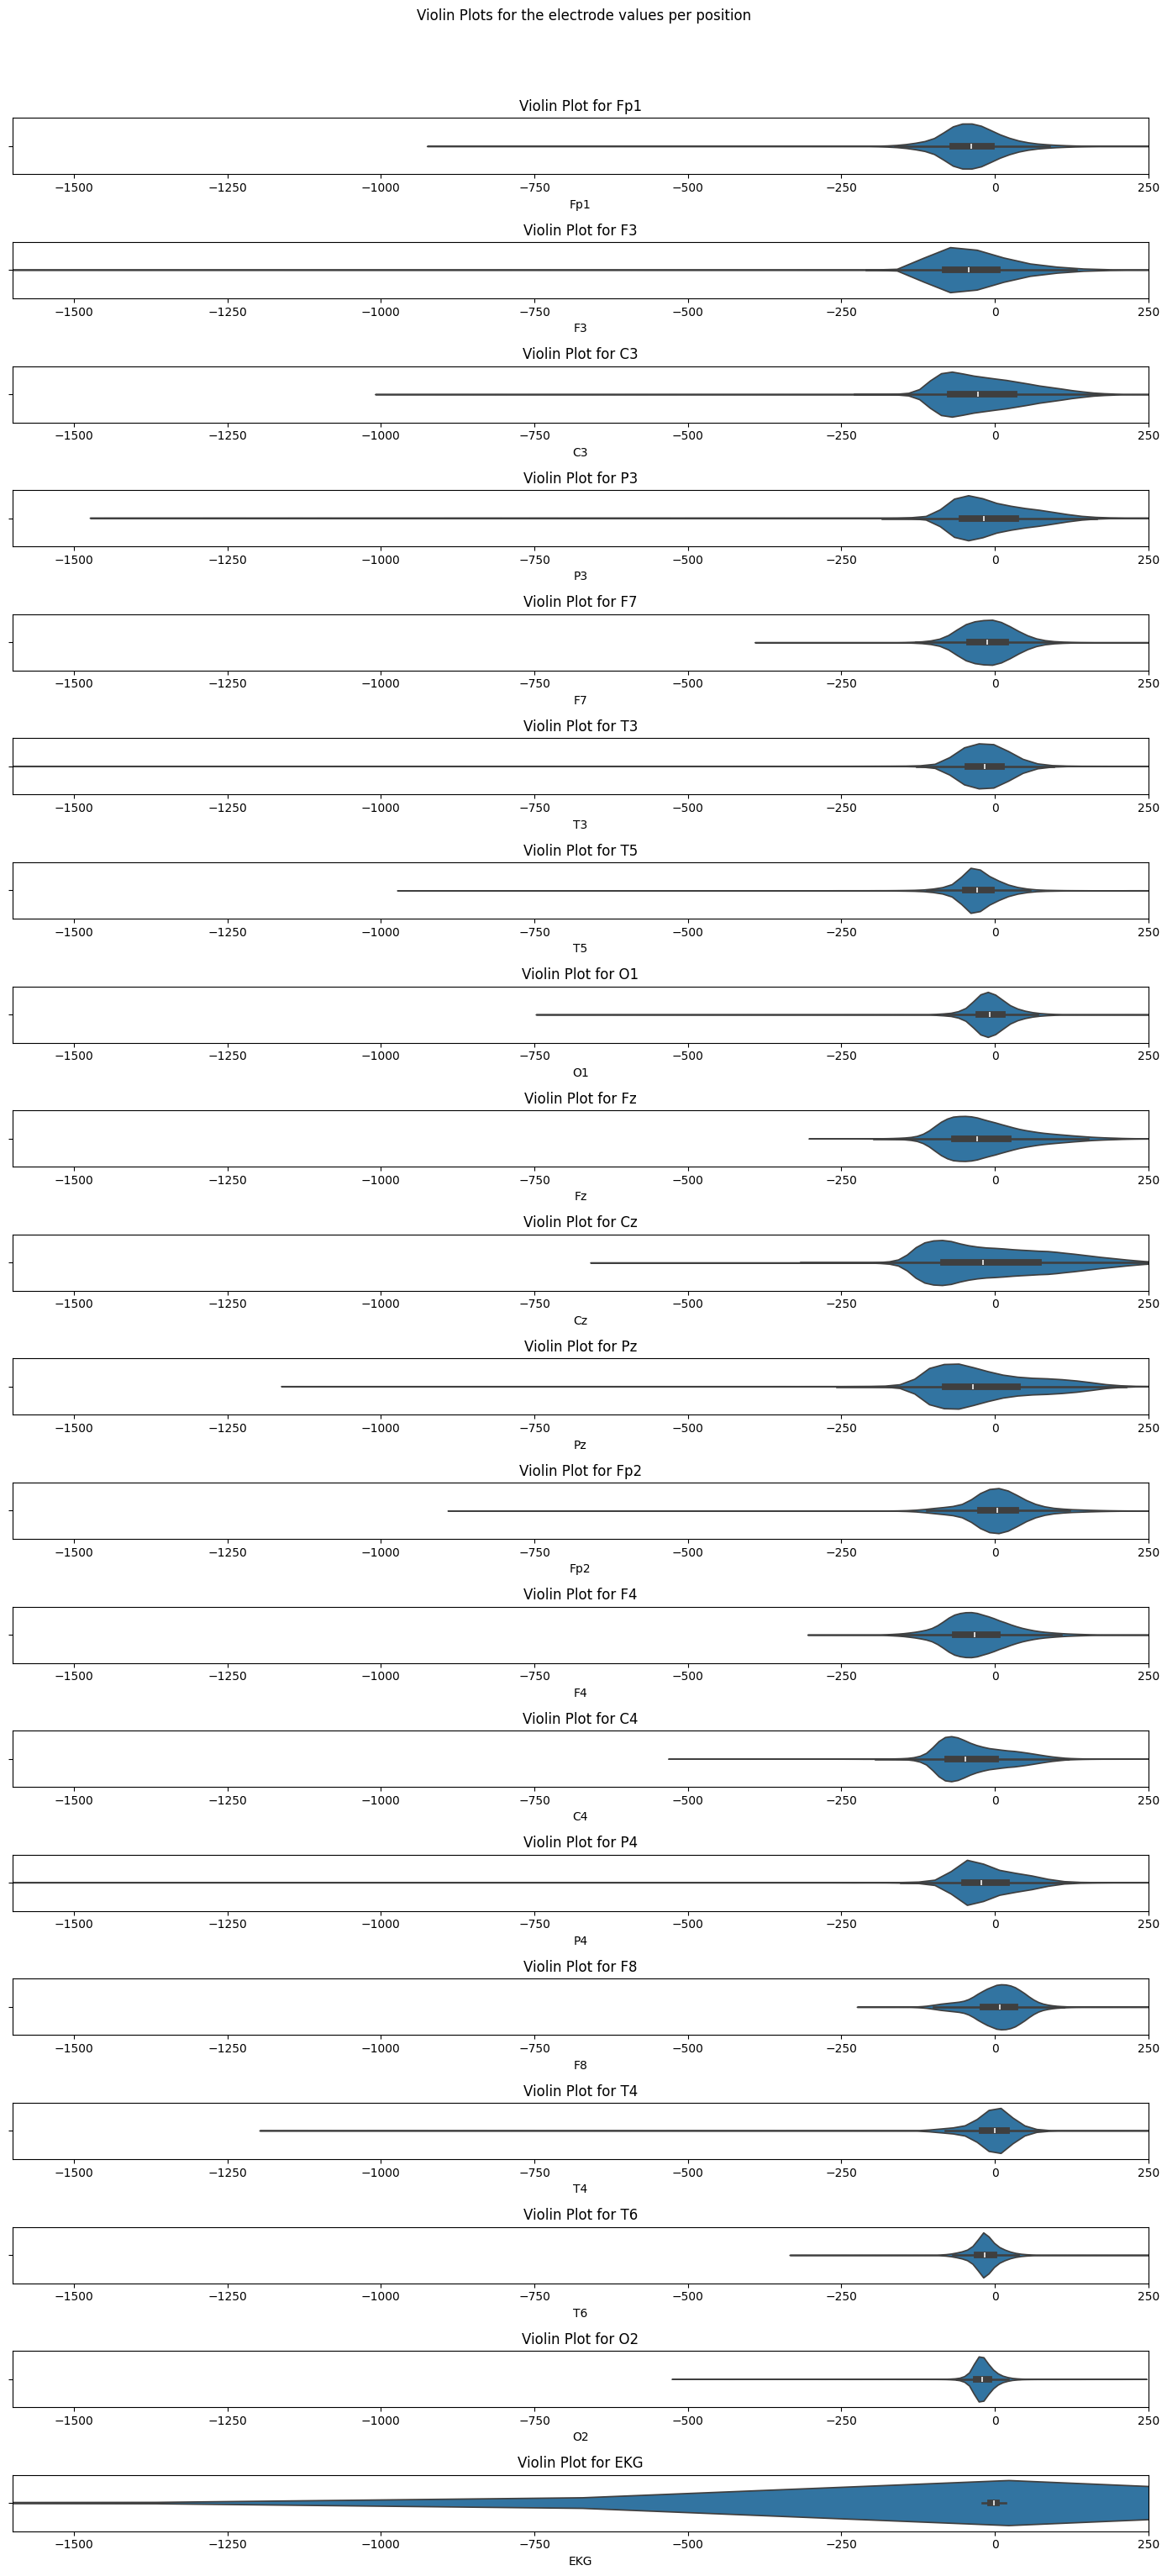

In [19]:
columns = df_eeg.columns

plt.figure(figsize=(14, 30))
for i, column in enumerate(columns, 1):
    plt.subplot(20, 1, i)
    sns.violinplot(x=df_eeg[column])
    plt.title(f'Violin Plot for {column}')
    plt.xlim(-1600, 250)

plt.suptitle('Violin Plots for the electrode values per position', y=1.02)
plt.tight_layout()
plt.show()

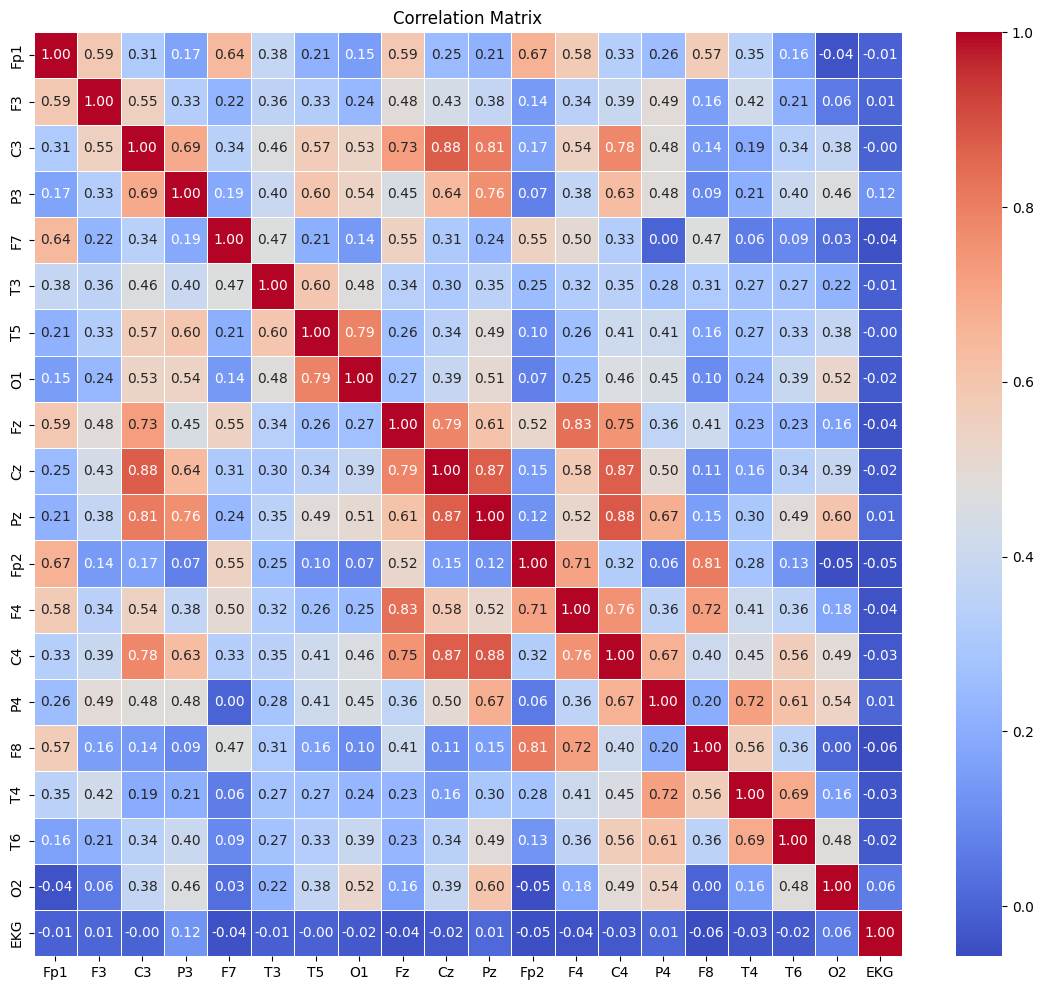

In [20]:
plt.figure(figsize=(14, 12))
sns.heatmap(df_eeg.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

### Sample spectrogram table

In [21]:
df_spect = pd.read_parquet('353733.parquet')
df_spect.shape

(320, 401)

To map from the metadata in the train.csv file to a spectrogram file we reference the spectrogram_id number. Each spectrogram_sub_id references a 10 min long subsample of one spectrogram. Each row in the spectrogram is 2 seconds, therefore a 10 minute (600 second) subsample is represented by 300 rows. We can determine at which row the subsample begins and ends using the spectrogram_label_offset_seconds feature. If the offset is equal to 22 seconds, we can navigate to the row number where time = 22+1 = 23, which is row 23 // 2 = 11. Therefore the subsample begins at row 11 and ends after 600 seconds, or 300 rows later. The rows of the subsample are then rows 11 to 310.

In [22]:
df_spect.describe().T

count        mean         std   min       25%      50%       75%  \
time      320.0  320.000000  185.040536  1.00  160.5000  320.000  479.5000   
LL_0.59   320.0    4.354875    2.296027  1.18    2.8575    3.895    5.0525   
LL_0.78   320.0    6.255469    2.952741  1.67    4.2075    5.565    7.4725   
LL_0.98   320.0    8.247343    3.428192  2.57    5.7450    7.690   10.0850   
LL_1.17   320.0    9.557375    3.912668  2.37    6.7275    8.870   11.7750   
...         ...         ...         ...   ...       ...      ...       ...   
RP_19.14  320.0    0.299188    0.443428  0.04    0.1300    0.185    0.2625   
RP_19.34  320.0    0.305031    0.455136  0.04    0.1375    0.190    0.2600   
RP_19.53  320.0    0.302875    0.453245  0.03    0.1300    0.190    0.2800   
RP_19.73  320.0    0.304563    0.480294  0.04    0.1300    0.180    0.2700   
RP_19.92  320.0    0.303844    0.497602  0.03    0.1200    0.175    0.2600   

                 max  
time      639.000000  
LL_0.59    17.389999  
LL_0.78    20.580000  
LL_0.98    21.070000  
LL_1.17    23.459999  
...              ...  
RP_19.14    3.010000  
RP_19.34    3.340000  
RP_19.53    3.410000  
RP_19.73    4.080000  
RP_19.92    3.530000  

[401 rows x 8 columns]

In [23]:
df_spect.head()

time  LL_0.59  LL_0.78  LL_0.98  LL_1.17  LL_1.37    LL_1.56    LL_1.76  \
0     1     4.26    10.98     9.05    13.65    11.49   8.930000  18.840000   
1     3     2.65     3.97    12.18    13.26    14.21  13.230000   9.650000   
2     5     4.18     4.53     8.77    14.26    13.36  16.559999  19.219999   
3     7     2.41     3.21     4.92     8.07     5.97  12.420000  10.820000   
4     9     2.29     2.44     2.77     4.62     5.39   7.080000   9.840000   

   LL_1.95    LL_2.15  ...  RP_18.16  RP_18.36  RP_18.55  RP_18.75  RP_18.95  \
0    19.26  19.240000  ...      0.31      0.17      0.28      0.19      0.24   
1     8.11  11.280000  ...      0.15      0.13      0.14      0.24      0.24   
2    17.51  22.650000  ...      0.29      0.21      0.16      0.25      0.28   
3    14.96  21.809999  ...      0.33      0.51      0.49      0.64      0.58   
4    12.27  14.410000  ...      0.44      0.38      0.48      0.63      0.45   

   RP_19.14  RP_19.34  RP_19.53  RP_19.73  RP_19.92  
0      0.27      0.29      0.16      0.22      0.19  
1      0.36      0.35      0.31      0.36      0.40  
2      0.28      0.34      0.48      0.44      0.48  
3      0.42      0.32      0.31      0.32      0.33  
4      0.45      0.49      0.33      0.31      0.34  

[5 rows x 401 columns]

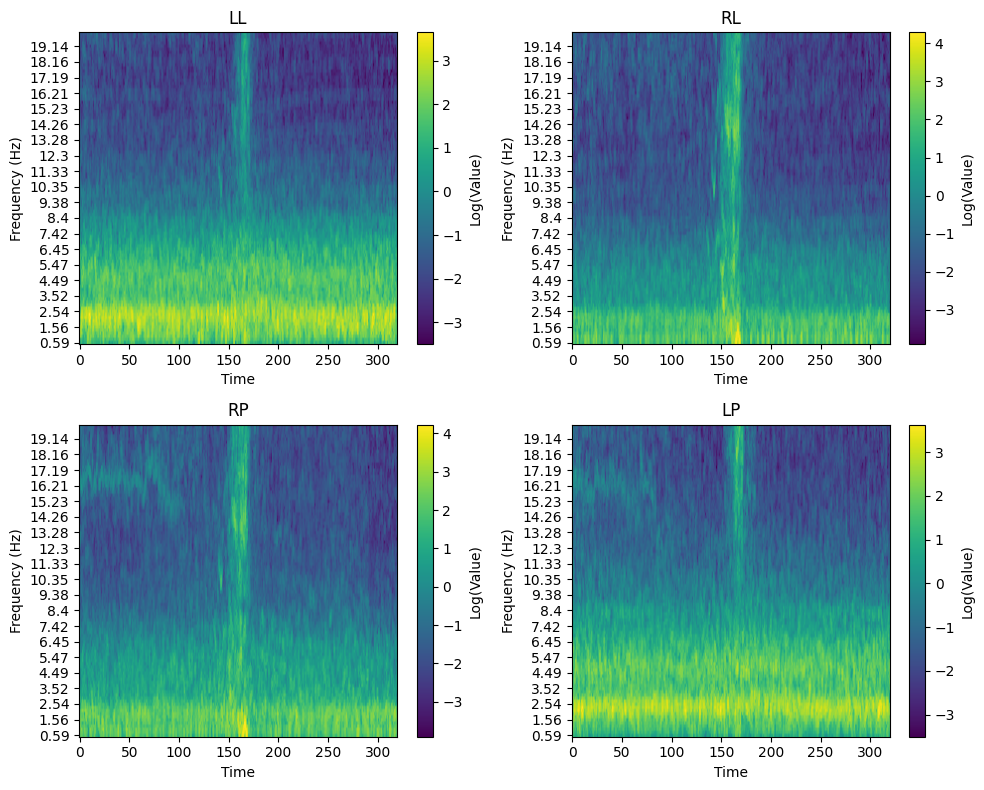

In [24]:
def plot_spectrogram(df_spect):
    '''
    source --> https://www.kaggle.com/code/clehmann10/plot-spectrograms
    '''

    split_spect = {
        "LL": df_spect.filter(regex='^LL', axis=1),
        "RL": df_spect.filter(regex='^RL', axis=1),
        "RP": df_spect.filter(regex='^RP', axis=1),
        "LP": df_spect.filter(regex='^LP', axis=1),
    }

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
    axes = axes.flatten()
    label_interval = 5
    for i, split_name in enumerate(split_spect.keys()):
        ax = axes[i]
        img = ax.imshow(np.log(split_spect[split_name]).T, cmap='viridis', aspect='auto', origin='lower')
        cbar = fig.colorbar(img, ax=ax)
        cbar.set_label('Log(Value)')
        ax.set_title(split_name)
        ax.set_ylabel("Frequency (Hz)")
        ax.set_xlabel("Time")

        ax.set_yticks(np.arange(len(split_spect[split_name].columns)))
        ax.set_yticklabels([column_name[3:] for column_name in split_spect[split_name].columns])
        frequencies = [column_name[3:] for column_name in split_spect[split_name].columns]
        ax.set_yticks(np.arange(0, len(split_spect[split_name].columns), label_interval))
        ax.set_yticklabels(frequencies[::label_interval])
    plt.tight_layout()
    plt.show()

plot_spectrogram(df_spect)

In [27]:
GET_ROW = 0
# EEG_PATH = 'train_eegs/'
# SPEC_PATH = 'train_spectrograms/'

row = df.iloc[GET_ROW]

eeg_id = row.eeg_id
eeg = pd.read_parquet(f'{eeg_id}.parquet')
eeg_sub_id = row.eeg_sub_id
eeg_offset = int(row.eeg_label_offset_seconds )
eeg = eeg.iloc[eeg_offset*200:(eeg_offset+50)*200]

spec_id = row.spectrogram_id
spectrogram = pd.read_parquet(f'{spec_id}.parquet')
spec_sub_id = row.spectrogram_sub_id
spec_offset = int(row.spectrogram_label_offset_seconds )
spectrogram = spectrogram.loc[(spectrogram.time>=spec_offset)
                     &(spectrogram.time<spec_offset+600)]

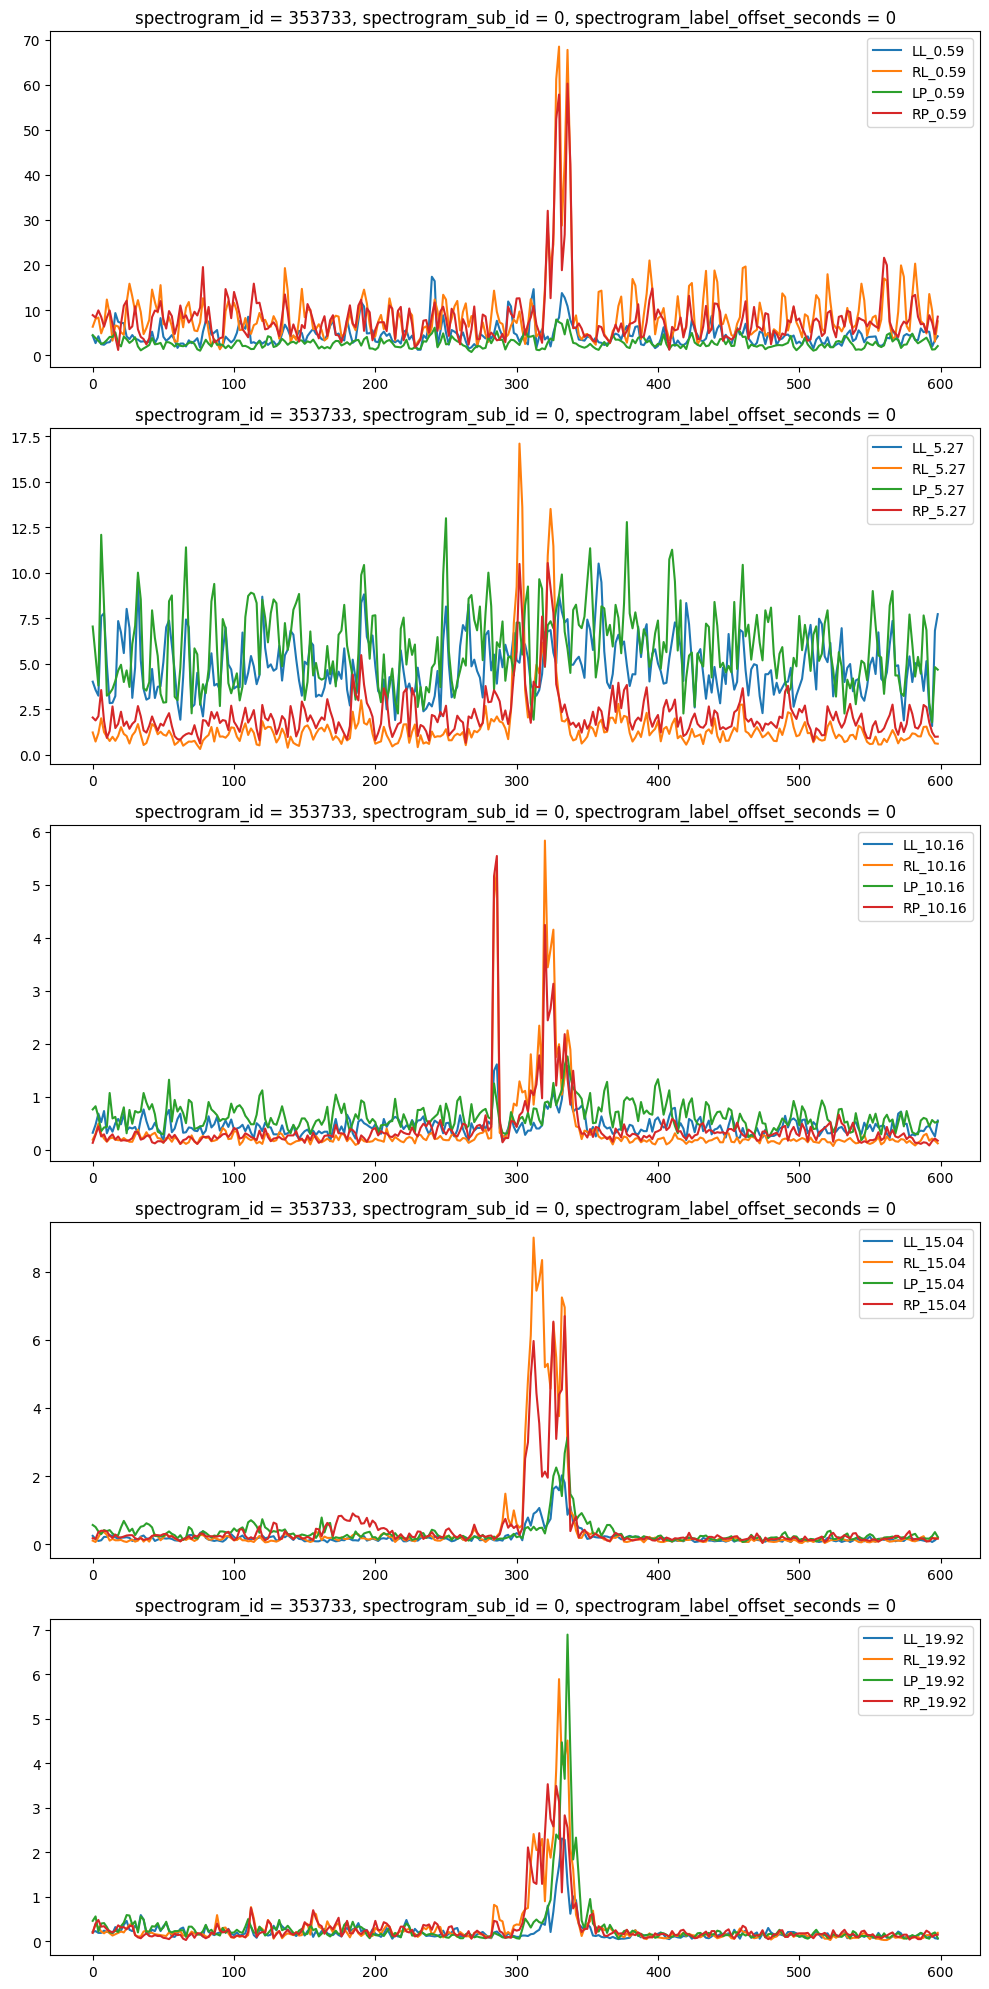

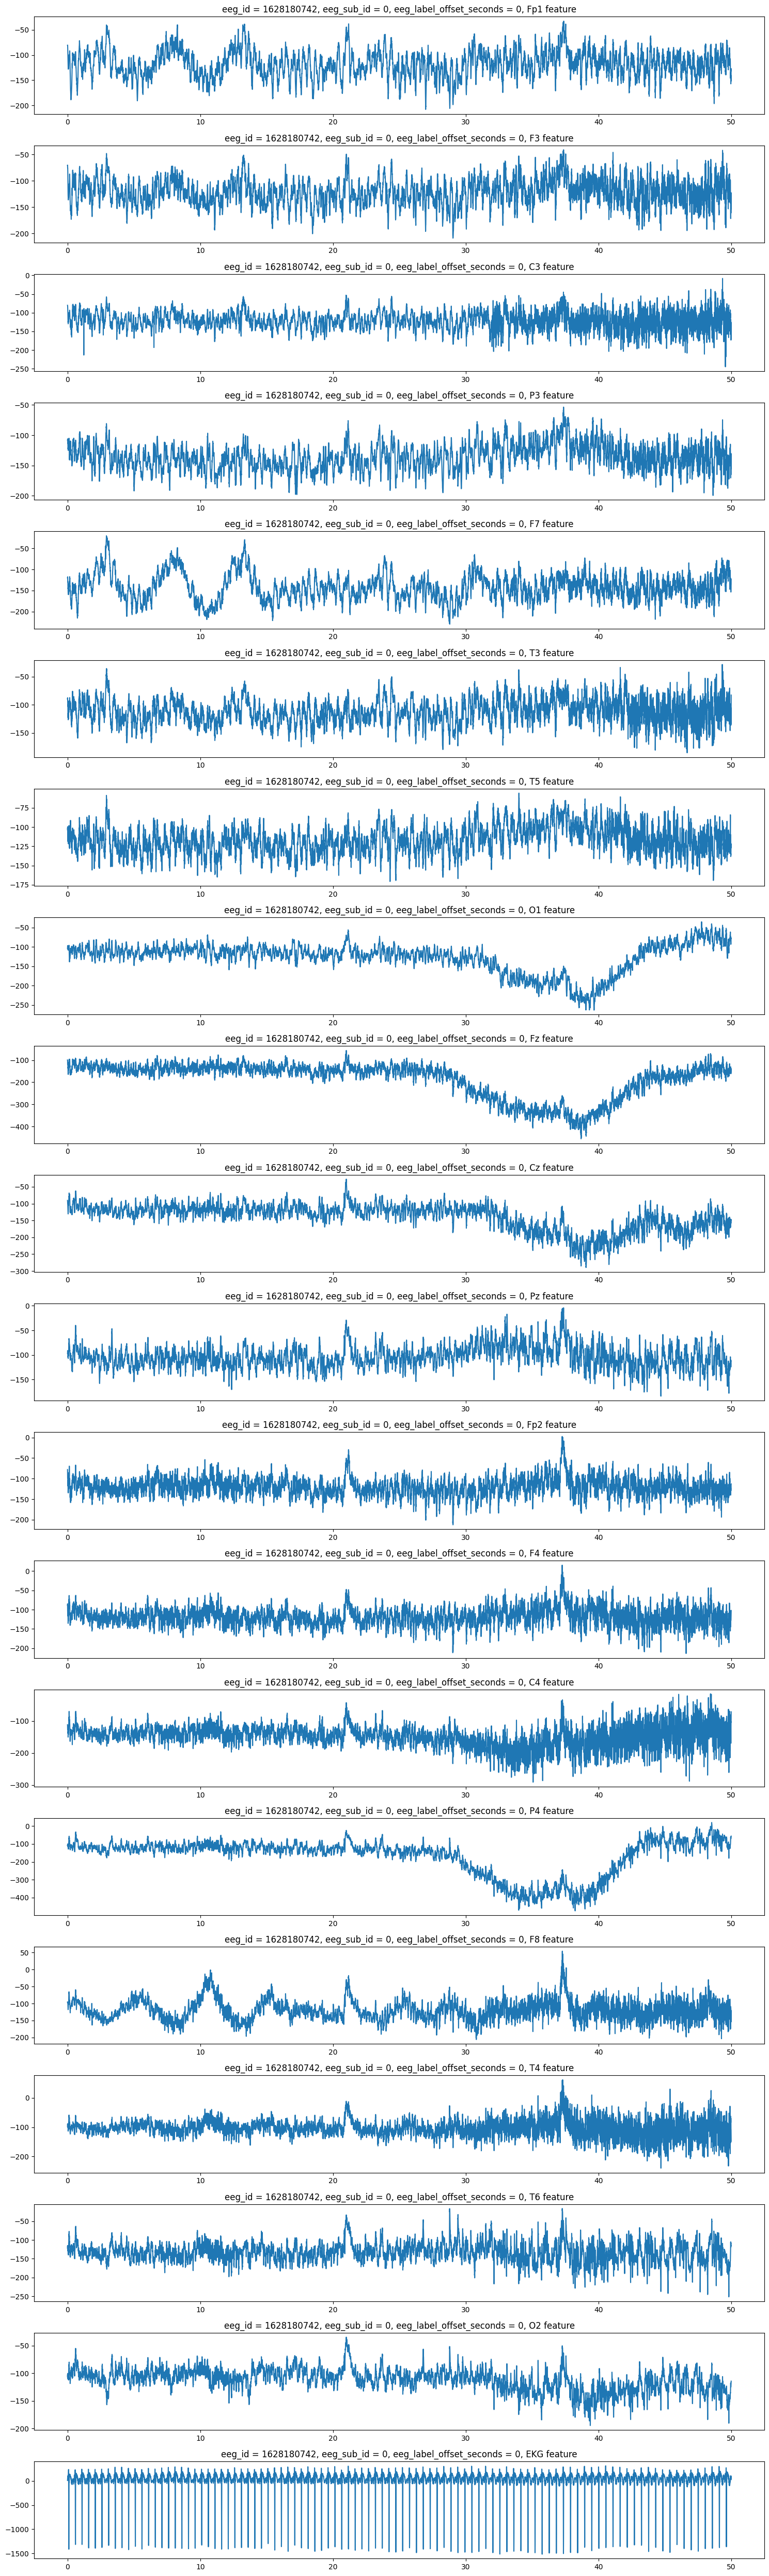

In [28]:
frequencies = ['0.59', '5.27', '10.16', '15.04', '19.92']
region = ['LL_', 'RL_', 'LP_', 'RP_']
r_f = []

for f in frequencies:
  inner = []
  for r in region:
    inner.append(r + f)
  r_f.append(inner)

time_range = np.arange(0, 600, 2)
plt.figure(figsize=(10, 20))

for i, group in enumerate(r_f, start=1):
    plt.subplot(len(r_f), 1, i)
    for feature in group:
        plt.plot(time_range, spectrogram[feature], label=feature)
    plt.title(f'spectrogram_id = {spec_id}, spectrogram_sub_id = {spec_sub_id}, spectrogram_label_offset_seconds = {spec_offset}')
    plt.legend()

plt.tight_layout()
plt.show()

time_range = np.arange(0,50,0.005)
channels = df_eeg.columns
plt.figure(figsize=(15, 50))

for i, channel in enumerate(channels, start=1):
    plt.subplot(len(channels), 1, i)
    plt.plot(time_range, eeg[channel])
    plt.title(f'eeg_id = {eeg_id}, eeg_sub_id = {eeg_sub_id}, eeg_label_offset_seconds = {eeg_offset}, {channel} feature')

plt.tight_layout()
plt.show()

## Summary of data

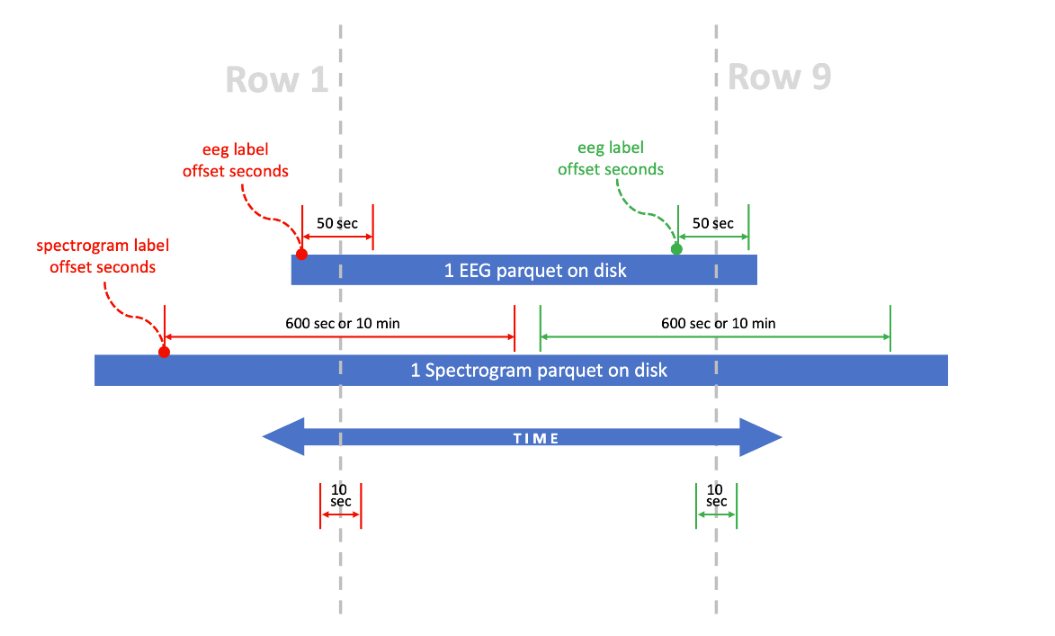

In [29]:
img = plt.imread('map2.png')
plt.figure(figsize = (15,8))
plt.axis('off')
plt.imshow(img);

The EEG parquet files contain data that spans longer than 50 seconds. One EEG parquet file has multiple 50 second time windows within the same file. Similarily, the spectrogram parquet files span longer than 600 seconds and contain multiple 10 minute windows.

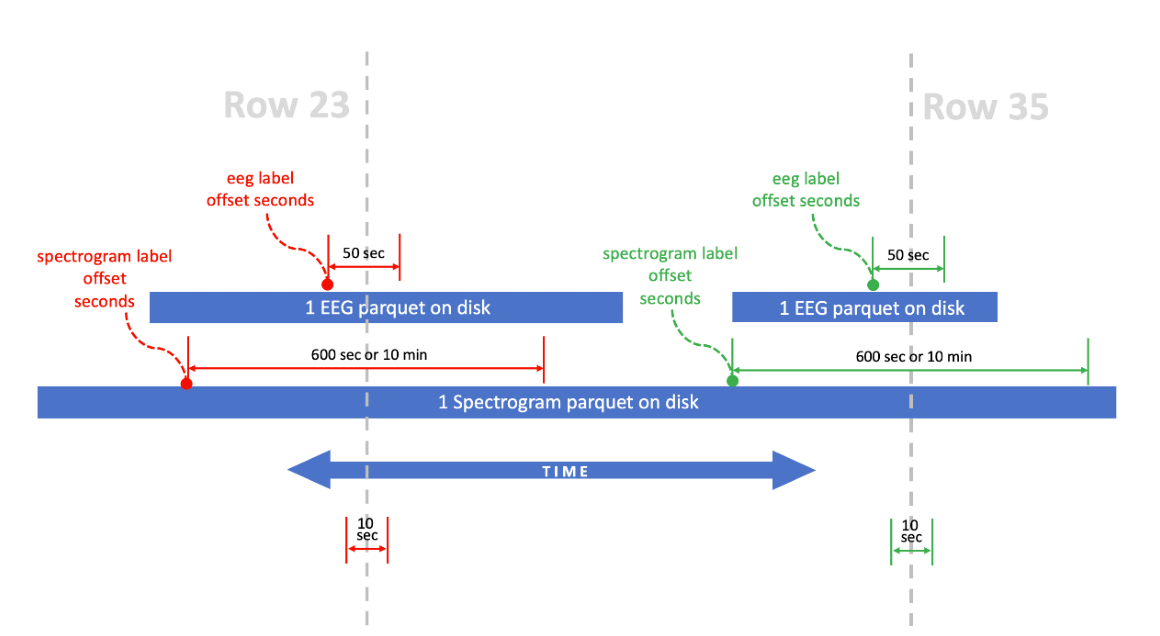

In [30]:
img = plt.imread('map3.png')
plt.figure(figsize = (15,8))
plt.axis('off')
plt.imshow(img);

There are fewer spectrogram parquet files than EEG parquet files. This is because two rows may have the same spectrogram parquet file but different EEG parquet files.

## Conclusions prior to preprocessing


__Utilizing the data__
- Since the spectrogram contains all the data from the EEG data, we can initially focus only on the spectrogram data and will not be using the EEG data. It is possible that later on utilizing the EEG data in addition to the spectrogram will improve our model, especially for cases where the classification is more unclear.

__Processing the target__
- Our target features are columns [seizure/lpd/gpd/lrda/grda/other]_vote
- The votes are integers, and sometimes only 3 votes were cast, while other times more than 25 votes were cast. There are two possible options,
  1. we could leave the votes as is
  2. we could convert the values to ratios. For example, if one vote is cast for other and another vote is cast for lpr, we would convert the values to 0.5 and 0.5.

  There are advantages and disadvatages to both options. The main advantage of option 1 is that if for a certain row there would be a high number of unanimous votes, it would communicate to the model very clearly how to classify this case and other similar ones. However, the disadvantage is that the number of votes in itself is not a valuable number for us to predict. The important task is to classify the brain activity. Therefore, it makes most sense to preprocess the target to be ratios of the total votes rather than counts.

__Choosing our baseline model__
- This is a classification problem, however we must output the prediction probability of each class, rather than caring about the chosen class. This is important because we want to simulate the human process of classifying these cases. In many cases, highly experienced neurospecialists will not unanimously vote on a signle diagnosis, and we want our model to output non-unanimous classifications when it is not extremely clear.

- For our baseline model we can try a Random Forest Classifier. This could be a good initial model to test for a few reasons:
  1. Scaling of the data is unecessary
  2. Can capture non-linear relationships between the features and target
  3. Generally it performs well without much hyperparameter tuning

__Choosing our metric__
- For simplicity at the initial stages, we need a metric for multi-class classification problems, such as log_loss.
- We can also use the Kullbeck Liebler Divergence

### possible changes:
####  train.csv
 - change expert_consensus to some kind of categroy or to remove it completely <br>
 it has 6,unique values: ['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'] which their dominant amount appear ( numbers can be seen at columns:'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote)
 - when the model will be completed all columns beside ['eeg_id', 'spectrogram_id', 'patient_id'] need to be deleted
 because test.csv has only:['eeg_id', 'spectrogram_id', 'patient_id']
 - eeg_id is too short 10680/17360 maybe the rest are test
 - spectrogram_id is too short as well 10680/17360 maybe the rest are test
#### eeg
 - no Nans at the one sample, possible Nans at others
 - to consider median\ average data replacement
 - if all Nans at rows, maybe to delete them
#### spectogram
 - 8.6% percent Nans at sample, possible bad measurement.
 - to consider median\ average data replacement
 - if all Nans at rows, maybe to delete them

### next steps
 - randomly sample some more eeg and spectogram looking for missing values.
 - randomly sample some more eeg and spectogram looking for anomalies.
 - plotting some signals
 - maybe ploting signals after Fast Fourier Transform (FFT)
 - to see if categories of expert_consensus can be aggregated (their eeg and spectograms).
 - Correlation analysis of eeg and spectograms per features of the train.csv
 - maybe even Dimensionality Reduction, <br>
 correction: must it will be too heavy.
 - modeling will require preprocessing of handling missing values, and probably normalization or other scaler or logoritimic